In [1]:
from IPython.display import clear_output

In [2]:
%pip install torch torchvision torchsummary
%pip install numpy
%pip install matplotlib

clear_output()

In [3]:
import torch
import numpy as np
import torch.nn as nn
from torchvision import transforms
from torchvision.datasets import MNIST
from torch.utils.data.sampler import SubsetRandomSampler
from torchsummary import summary
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

## Contents

Today we'll attempt to create a number image generator through auto encoders. Here's the technique

1. The model has 2 parts, an encoder and a decoder
2. The encoder takes number image (mnist) and converts it into an embedding/encoding of specified size (output of encoder last layer). by passing it through multiple linear layers.
3. The decoder then takes that encoding and attempts to re-create the original image
4. During training, our cost function is the difference between generated image and original image. we'll use MSE Loss for this
5. Once the training is complete, we'll create our own embeddings of specified size ourselves and run it through the decoder to generate images


Note: In this notebook we'll limit ourselves to Linear Layers or BatchNorm's only (and activations). Which means NO CNN, attention, or anything fancier. For this reason, the performance might be questionable. What we wanna see is the model trying to capture the pattern?

You need to know:

1. **pytorch** (for impelementation)
2. a bit of **torch dataloaders and datasets** (not necessary but helps understanding how we're loading data)
3. A little bit of **matplotlib** (for result and training trajectory visualization)

In [4]:
batch_size = 64

#preprocess the MNIST dataset
# Random cropping adds variability, and ToTensor converts images to tensors
train_transforms = transforms.Compose([
                        transforms.RandomCrop(28, padding=4),
                        transforms.ToTensor(),
                    ])

# TODO 1: Load the MNIST dataset and prepare the DataLoader.
# Hint: Use `MNIST` for loading data and `DataLoader` for batching.

# Load the MNIST training dataset with transformations
train_data = ...
# Create a DataLoader for the training dataset
train_loader = ...

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:11<00:00, 894kB/s] 


Extracting ./datasets/MNIST/raw/train-images-idx3-ubyte.gz to ./datasets/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 132kB/s]


Extracting ./datasets/MNIST/raw/train-labels-idx1-ubyte.gz to ./datasets/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:06<00:00, 237kB/s]


Extracting ./datasets/MNIST/raw/t10k-images-idx3-ubyte.gz to ./datasets/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.04MB/s]

Extracting ./datasets/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./datasets/MNIST/raw



In [5]:
class AutoEncoderGenerator(nn.Module):

  def __init__(self, dim_z):
    super().__init__()

    # Encoder: Compresses the input image into a smaller representation
    self.Encoder = nn.Sequential(
        # 1024 > 512 > 256 > dim z

        nn.Linear(28*28, 1024), # FC layer
        nn.LeakyReLU(), # activation layer
        nn.BatchNorm1d(1024), # normalization

        nn.Linear(1024, 512),
        nn.LeakyReLU(),
        nn.BatchNorm1d(512),

        nn.Linear(512, 256),
        nn.LeakyReLU(),

        nn.Linear(256, dim_z),
        nn.Tanh(), # Ensures encoding values are between -1 and 1
      )

    # Decoder: Reconstructs the image from the compressed representation

    self.Decoder = nn.Sequential(
        # TODO 2: Implement the decoder structure.
        # Hint: Follow the Encoder's pattern in reverse to reconstruct the image.

      )

  def forward(self, x):

    original_shape = x.shape # Save original shape for reconstruction
    x = torch.flatten(x, start_dim=1)  # Flatten the image for the encoder

    z = self.Encoder(x)
    x = self.Decoder(z)

    x = x.view(original_shape)  # Reshape to the original image dimensions

    return x


In [6]:
dim_z = 128
model = AutoEncoderGenerator(dim_z=dim_z)

In [7]:
# TODO 3: Add a summary of the model to review its structure and parameters.
# Hint: Use `summary` and pass the input shape and device information.


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1024]         803,840
         LeakyReLU-2                 [-1, 1024]               0
       BatchNorm1d-3                 [-1, 1024]           2,048
            Linear-4                  [-1, 512]         524,800
         LeakyReLU-5                  [-1, 512]               0
       BatchNorm1d-6                  [-1, 512]           1,024
            Linear-7                  [-1, 256]         131,328
         LeakyReLU-8                  [-1, 256]               0
            Linear-9                  [-1, 128]          32,896
             Tanh-10                  [-1, 128]               0
           Linear-11                  [-1, 256]          33,024
        LeakyReLU-12                  [-1, 256]               0
           Linear-13                  [-1, 512]         131,584
        LeakyReLU-14                  [

In [8]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

model.to(device)

num_epochs = 20
lr = 1e-4

# TODO 4: Define the optimizer and loss function.
# Hint: Use `Adam` for optimization and `MSELoss` for reconstruction loss.
optimizer = ...
criterion = ...

In [9]:
train_losses = []

for i in range(num_epochs):

  epoch_weighted_loss = 0
  for (X, _) in train_loader:

    X = X.to(device)

    Xhat = model(X)  # Xhat because we're trying to have the model regenerate what's fed to it (X)


    optimizer.zero_grad()

    # TODO 5: Perform backward propagation and update the model's parameters.
    # Hint: Compute the loss, gradients then take a step


    epoch_weighted_loss += loss.item()*len(X)

  epoch_loss = epoch_weighted_loss/len(train_loader.dataset)

  print(f'epoch {i}/{num_epochs}, loss = {epoch_loss}')

  train_losses.append(epoch_loss)

epoch 0/20, loss = 0.06070761678218842
epoch 1/20, loss = 0.035399246317148206
epoch 2/20, loss = 0.029308636514345805
epoch 3/20, loss = 0.02581974238952001
epoch 4/20, loss = 0.023432473900914193
epoch 5/20, loss = 0.021771508940060934
epoch 6/20, loss = 0.02049717304110527
epoch 7/20, loss = 0.01938963963488738
epoch 8/20, loss = 0.01844850172797839
epoch 9/20, loss = 0.017506113814314207
epoch 10/20, loss = 0.016707787363727886
epoch 11/20, loss = 0.015980732431014378
epoch 12/20, loss = 0.015454950295885403
epoch 13/20, loss = 0.01496064887146155
epoch 14/20, loss = 0.014522396469116211
epoch 15/20, loss = 0.01410423283179601
epoch 16/20, loss = 0.013731916869183382
epoch 17/20, loss = 0.01334106760819753
epoch 18/20, loss = 0.013074053728083769
epoch 19/20, loss = 0.012810971807936828


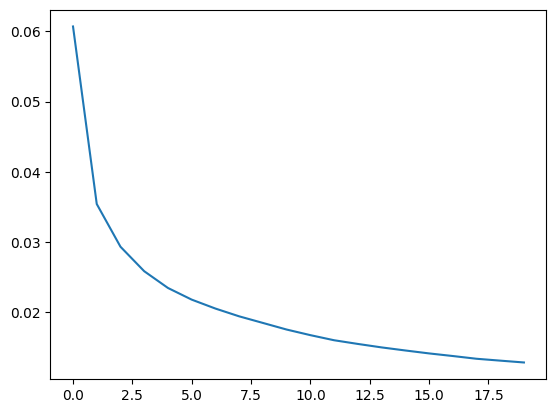

In [10]:
plt.plot(train_losses)

In [11]:
# Helper function to display results
def display_image_grid(images, num_rows, num_cols, title_text):

    fig = plt.figure(figsize=(num_cols*3., num_rows*3.), )
    grid = ImageGrid(fig, 111, nrows_ncols=(num_rows, num_cols), axes_pad=0.15)

    for ax, im in zip(grid, images):
        ax.imshow(im, cmap="gray")
        ax.axis("off")

    plt.suptitle(title_text, fontsize=20)
    plt.show()

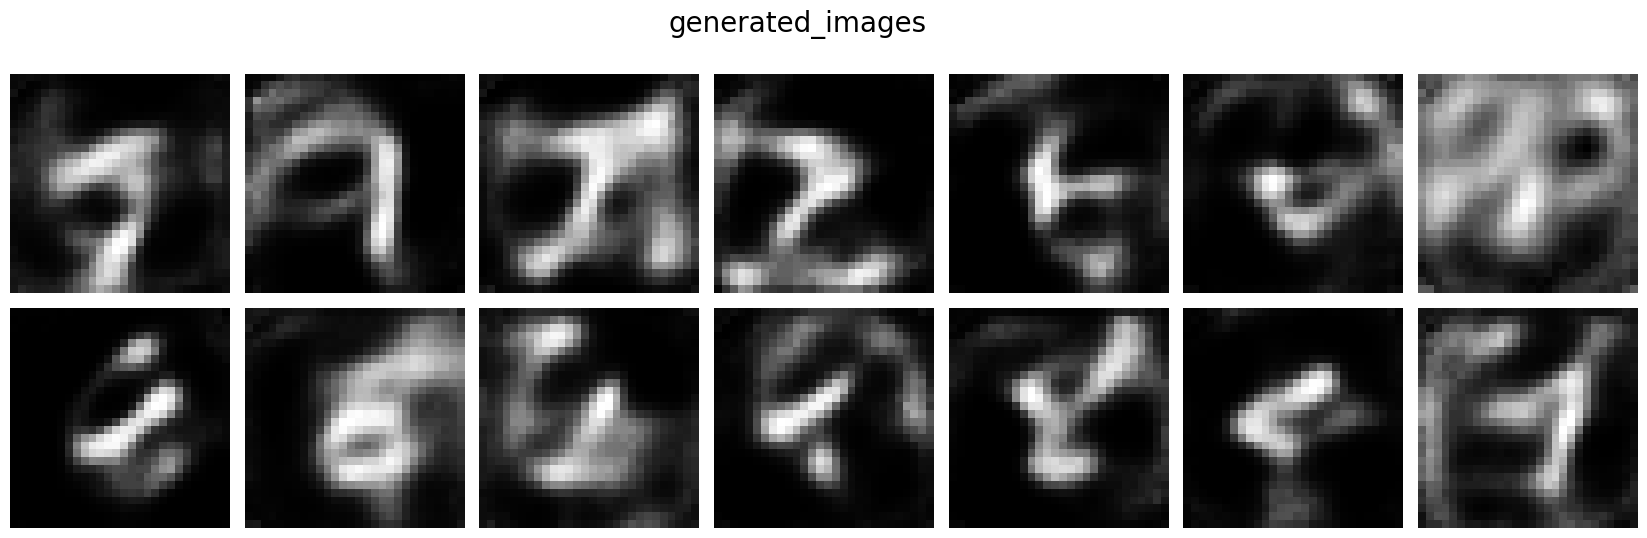

In [12]:
# Now we will try some actual generation. We will sample the encodings randomly and then pass them through decoder

rows, cols = 2, 7
sample_encodings = (torch.rand(rows*cols, dim_z).to(device) - 0.5) * 2 # encoding space: [-1,1)
with torch.no_grad():
  generations = model.Decoder(sample_encodings).cpu()
  generations = generations.reshape(-1, 28, 28, 1)
display_image_grid(generations, rows, cols, "generated_images")

The images aren't too fancy but we can see it's trying to learn.
In a few images we can also guess the number it's trying to generate